<a href="https://colab.research.google.com/github/AbeerBibi/Adult-income-prediction/blob/main/Project_4_Part_1_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns',100)
SEED = 321

In [2]:
df = pd.read_csv("/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week17/Data/adult.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


#Explore/clean the data

In [3]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [4]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

##Reduce uneccessary status and

In [5]:
def convert_marital_status(status):
    if status in ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']:
        return 'married'
    elif status in ['Never-married', 'Separated', 'Widowed']:
        return 'single'
    else:
        return 'divorced'

df['marital-status'] = df['marital-status'].apply(convert_marital_status)

#drop high many values columns
df = df.drop(['capital-gain', 'capital-loss', 'fnlwgt'], axis=1)

#Replace the income to 0 if less than 50K and 1 if more than 50K
income_mapping = {'<=50K': 0, '>50K': 1}
df['income'] = df['income'].replace(income_mapping)
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,single,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,HS-grad,9,married,Farming-fishing,Husband,White,Male,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,married,Protective-serv,Husband,White,Male,40,United-States,1
3,44,Private,Some-college,10,married,Machine-op-inspct,Husband,Black,Male,40,United-States,1
4,18,?,Some-college,10,single,?,Own-child,White,Female,30,United-States,0


#Exploratory Visualizations
Creating exploratory visualizations to understand your data and search for trends.

In [6]:
df.dtypes

age                 int64
workclass          object
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
hours-per-week      int64
native-country     object
income              int64
dtype: object

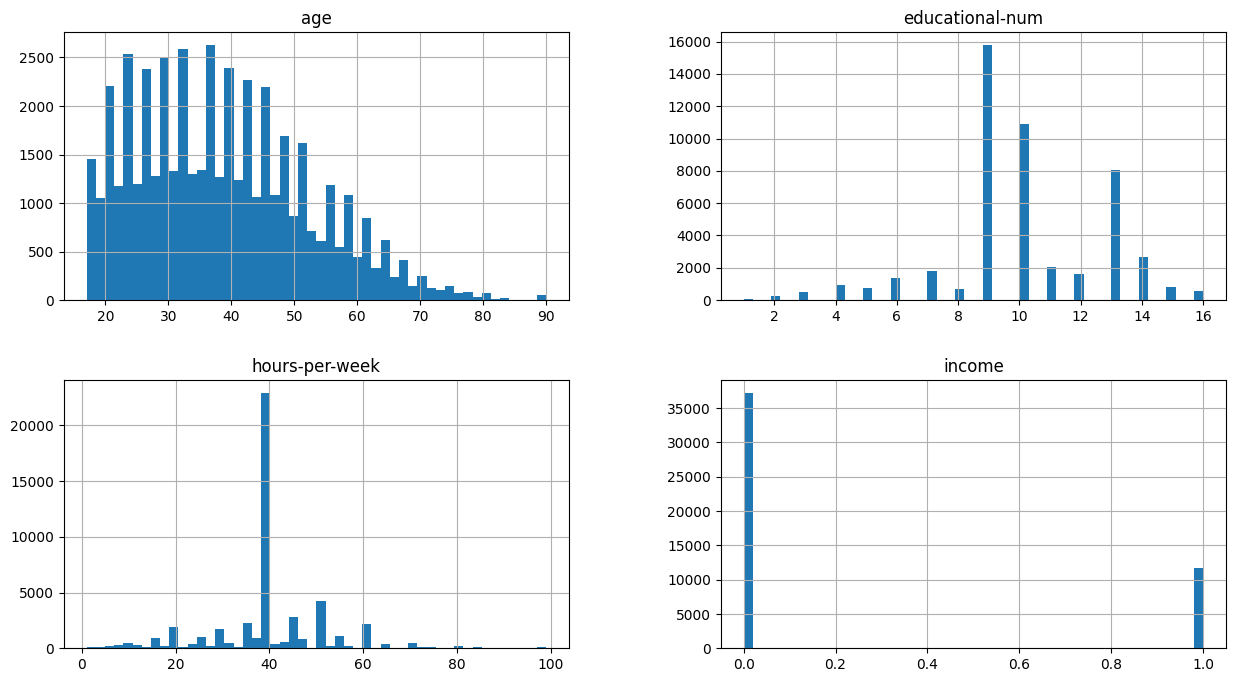

In [7]:
df.hist(figsize=(15, 8),bins = 50)
plt.show()

#Choose a model
- Preprocess data
- Fit and evaluate a default model
- Extract and visualize the top 10 features using permutation importance (from Intro to ML Week 4)
- Add your observations in a Markdown: Do these features make sense based on the business case? (check below visualisation)
 - The identified features align with expectations for factors influencing income level: occupation, age, marital status, and education are well-established predictors. Other factors like hours worked, work class, and gender can also significantly impact income.

In [8]:
# Make x and y variables
y = df['income']
X = df.drop(columns=['income'])
# train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
2594,27,Private,Some-college,10,married,Adm-clerical,Wife,White,Female,55,United-States
30028,38,Private,Masters,14,married,Exec-managerial,Husband,Asian-Pac-Islander,Male,40,?
48046,19,?,Some-college,10,single,?,Own-child,White,Female,40,United-States
34977,55,Private,10th,6,married,Craft-repair,Husband,White,Male,40,United-States
4516,17,Private,11th,7,single,Sales,Own-child,White,Female,23,United-States


In [9]:
# make list of categorical columns
ohe_cols = X_train.select_dtypes('object').columns

# instantiate preprocessors
ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# make pipeline for categorical data
ohe_pipe = make_pipeline(ohe_encoder)

# make tuple for column transformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

In [10]:
# make list of numeric columns
num_cols = X_train.select_dtypes('number').columns

scaler = StandardScaler()

# make pipeline for numerical data
num_pipe = make_pipeline(scaler)

# make tuple for column transfomer
num_tuple = ('numeric', num_pipe, num_cols)

In [11]:
# Define a column transformer
preprocessor  = ColumnTransformer([num_tuple, ohe_tuple],
                                  verbose_feature_names_out=False)

In [12]:
## Instantiate default random forest model
rf_classifier= RandomForestClassifier(random_state=42)
#model pipeline
rf_classifier_pipe = make_pipeline(preprocessor, rf_classifier)
# Fit the model pipeline on the training data only
rf_classifier_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'educational-num', 'hours-per-week'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [13]:
from sklearn.inspection import permutation_importance
# Permutation importance takes a fit model and the test data.
r = permutation_importance(rf_classifier_pipe, X_test, y_test,n_repeats =5, random_state = SEED)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [14]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_test.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances

occupation         0.017574
age                0.016821
relationship       0.010171
marital-status     0.009778
hours-per-week     0.005798
educational-num    0.005454
workclass          0.004062
native-country     0.000884
race              -0.002359
gender            -0.002735
education         -0.007010
Name: permutation importance, dtype: float64

In [15]:
def get_color_dict(importances, color_rest='#006ba4' , color_top='green',
                    top_n=7):
    ## color -coding top 5 bars
    highlight_feats = importances.sort_values(ascending=True).tail(top_n).index
    colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}
    return colors_dict

In [16]:
colors_top7 = get_color_dict(permutation_importances, top_n=10)

In [17]:
def plot_importance_color(importances, top_n=None,  figsize=(8,6),
                          color_dict=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax

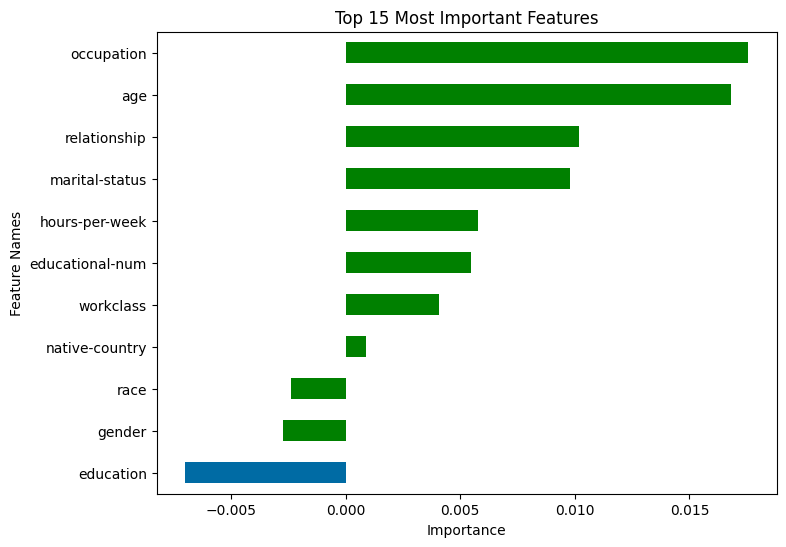

In [18]:
plot_importance_color(permutation_importances, color_dict=colors_top7,top_n=15);

#Create Explanatory Visualizations for the most important features.
- Select 2 out of the top 10 features from your permutation importances and produce explanatory visualizations showing the relationship between the feature and the target.


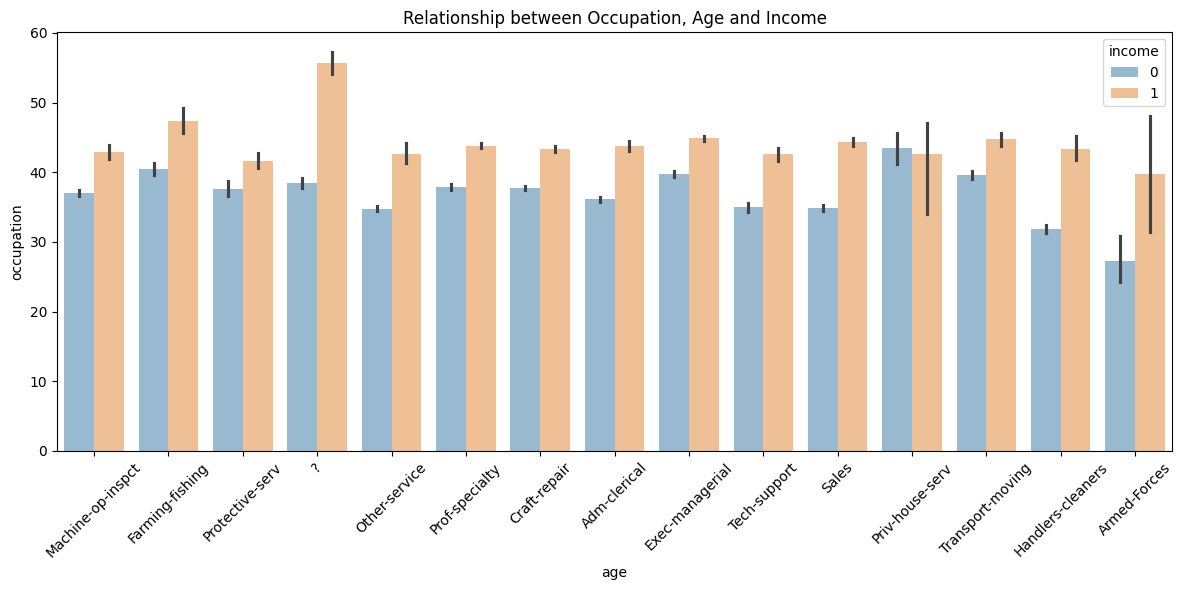

In [50]:
# Select the two features: Age and Occupation
features_to_plot = ['age', 'occupation']

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(figsize=(12, 6))

# Plot Occupation vs Income
sns.barplot(data=df, x='occupation', y='age', hue='income',  ax=axes, alpha=0.5)
axes.set_title('Relationship between Occupation, Age and Income')
axes.set_xlabel('age')
axes.set_ylabel('occupation')
plt.xticks(rotation=45)
# Adjust layout
plt.tight_layout()
plt.show()


From the graph above, we observe that both occupation and age exhibit significant importance in predicting income. The plots illustrate their relationships with income, reinforcing their positions as key features for predicting income levels.